In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
newdf=pd.read_csv("ab.csv")
newdf

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,KERALA,IDUKKI,13.4,22.1,43.6,150.4,232.6,651.6,788.9,527.3,308.4,343.2,172.9,48.1,3302.5,35.5,426.6,2276.2,564.2
637,KERALA,KASARGOD,2.3,1.0,8.4,46.9,217.6,999.6,1108.5,636.3,263.1,234.9,84.6,18.4,3621.6,3.3,272.9,3007.5,337.9
638,KERALA,PATHANAMTHITTA,19.8,45.2,73.9,184.9,294.7,556.9,539.9,352.7,266.2,359.4,213.5,51.3,2958.4,65.0,553.5,1715.7,624.2
639,KERALA,WAYANAD,4.8,8.3,17.5,83.3,174.6,698.1,1110.4,592.9,230.7,213.1,93.6,25.8,3253.1,13.1,275.4,2632.1,332.5


In [3]:
moddf=newdf.groupby(by=['STATE_UT_NAME']).mean().round(3)
moddf.reset_index(drop=False,inplace=True)

In [4]:
moddf.reset_index(drop=False,inplace=True)

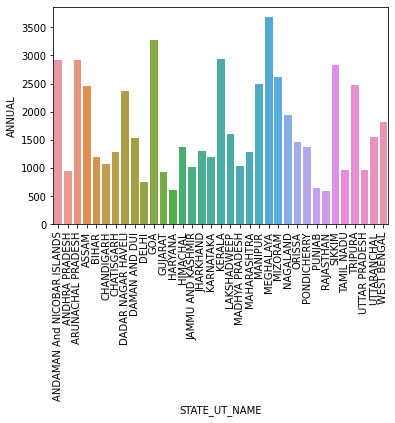

In [5]:
sns.barplot(x="STATE_UT_NAME",y="ANNUAL",data=moddf)
plt.xticks(rotation=90);
plt.show()

In [6]:
df=newdf.groupby('STATE_UT_NAME').ANNUAL.agg([max,min])

In [7]:
df.reset_index(drop=False,inplace=True)
df

,STATE_UT_NAME,max,min
0,ANDAMAN And NICOBAR ISLANDS,3015.7,2805.2
1,ANDHRA PRADESH,1165.2,572.7
2,ARUNACHAL PRADESH,4402.1,1300.4
3,ASSAM,3772.2,1341.0
4,BIHAR,2090.6,874.4
5,CHANDIGARH,1070.6,1070.6
6,CHATISGARH,1544.4,1029.3
7,DADAR NAGAR HAVELI,2374.1,2374.1
8,DAMAN AND DUI,2374.1,697.3
9,DELHI,747.1,747.1


In [8]:
df

,STATE_UT_NAME,max,min
0,ANDAMAN And NICOBAR ISLANDS,3015.7,2805.2
1,ANDHRA PRADESH,1165.2,572.7
2,ARUNACHAL PRADESH,4402.1,1300.4
3,ASSAM,3772.2,1341.0
4,BIHAR,2090.6,874.4
5,CHANDIGARH,1070.6,1070.6
6,CHATISGARH,1544.4,1029.3
7,DADAR NAGAR HAVELI,2374.1,2374.1
8,DAMAN AND DUI,2374.1,697.3
9,DELHI,747.1,747.1


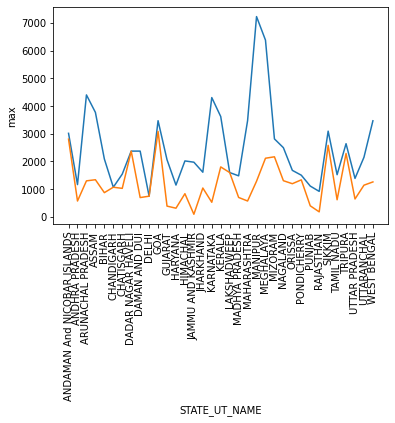

In [9]:
sns.lineplot(y="max",x="STATE_UT_NAME",data=df)
sns.lineplot(y="min",x="STATE_UT_NAME",data=df)
plt.xticks(rotation=90);
plt.show()

In [10]:
moddf=moddf[moddf.columns[1:14]]

In [11]:
moddf

,STATE_UT_NAME,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,ANDAMAN And NICOBAR ISLANDS,61.233,33.267,30.800,86.967,358.833,418.667,390.567,385.300,421.733,301.100,263.200,159.733
1,ANDHRA PRADESH,6.322,7.352,10.096,19.874,48.765,114.370,185.365,179.426,160.374,138.600,58.965,15.565
2,ARUNACHAL PRADESH,53.688,93.294,165.019,275.162,300.262,491.381,547.581,378.600,366.475,176.769,43.188,35.956
3,ASSAM,15.733,31.715,77.763,181.267,333.870,465.185,494.844,377.370,303.800,136.448,24.922,11.441
4,BIHAR,13.134,9.279,9.874,16.866,51.674,168.782,340.837,289.482,223.379,64.747,6.716,5.787
5,CHANDIGARH,44.300,38.900,33.200,14.800,30.100,120.000,282.400,287.500,154.300,31.800,9.900,23.400
6,CHATISGARH,10.378,10.472,12.978,13.117,17.483,180.583,375.406,375.339,214.444,61.844,8.494,5.811
7,DADAR NAGAR HAVELI,0.400,0.300,0.000,0.000,7.400,385.100,884.500,655.900,391.400,38.600,10.500,0.000
8,DAMAN AND DUI,0.550,0.500,0.200,0.100,4.150,276.500,583.100,394.600,227.600,35.550,12.400,0.450
9,DELHI,16.400,16.300,15.300,8.900,19.300,59.800,220.700,245.500,110.200,20.500,5.600,8.600


In [12]:
pedha=moddf.mean()
pedha=pd.DataFrame(pedha)
pedha.reset_index(drop=False,inplace=True)
pedha

C:\Users\aadar\AppData\Local\Temp\ipykernel_14936\734180110.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pedha=moddf.mean()


,index,0
0,JAN,21.856057
1,FEB,26.032857
2,MAR,39.448343
3,APR,64.622057
4,MAY,122.528429
5,JUN,275.111057
6,JUL,396.631086
7,AUG,332.253486
8,SEP,223.827800
9,OCT,115.784000


In [13]:
cheda=moddf.min()
cheda=pd.DataFrame(cheda)
cheda.reset_index(drop=False,inplace=True)

In [14]:
modf=moddf.max()
modf=pd.DataFrame(modf)
modf.reset_index(drop=False,inplace=True)

In [15]:
modf.rename(columns={'index':"month", 0:"max"}, inplace=True)

In [16]:
modf.drop(0,axis=0,inplace=True)

In [17]:
cheda.rename(columns={'index':"month", 0:'min'}, inplace=True)

In [18]:
cheda.drop(0,axis=0,inplace=True)

In [20]:
pedha

,index,0
0,JAN,21.856057
1,FEB,26.032857
2,MAR,39.448343
3,APR,64.622057
4,MAY,122.528429
5,JUN,275.111057
6,JUL,396.631086
7,AUG,332.253486
8,SEP,223.827800
9,OCT,115.784000


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

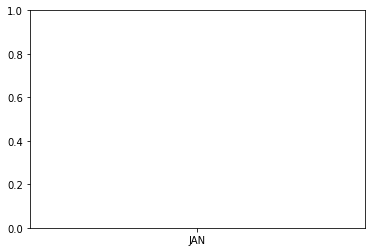

In [45]:
##min=cheda['min']
##max=modf['max']
#month=modf['month']
#men=pedha[0]
#plt.stackplot(month,max,min,men)

In [27]:
cheda.reset_index(drop=True,inplace=True)

In [28]:
pedha

,index,0
0,JAN,21.856057
1,FEB,26.032857
2,MAR,39.448343
3,APR,64.622057
4,MAY,122.528429
5,JUN,275.111057
6,JUL,396.631086
7,AUG,332.253486
8,SEP,223.827800
9,OCT,115.784000


In [29]:
men

0      21.856057
1      26.032857
2      39.448343
3      64.622057
4     122.528429
5     275.111057
6     396.631086
7     332.253486
8     223.827800
9     115.784000
10     52.005771
11     27.533114
Name: 0, dtype: float64

In [34]:
pedha

,index,0
0,JAN,21.856057
1,FEB,26.032857
2,MAR,39.448343
3,APR,64.622057
4,MAY,122.528429
5,JUN,275.111057
6,JUL,396.631086
7,AUG,332.253486
8,SEP,223.827800
9,OCT,115.784000


<AxesSubplot:xlabel='month', ylabel='max'>

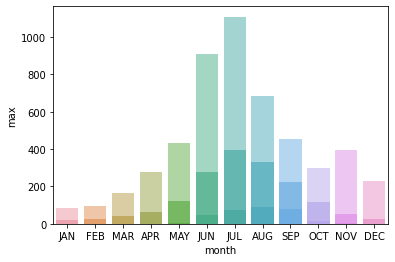

In [36]:
sns.barplot(x='month',y='min',data=cheda,alpha=0.9)

sns.barplot(x='index',y=0,data=pedha,alpha=0.7)
sns.barplot(x='month',y='max',data=modf,alpha=0.5)

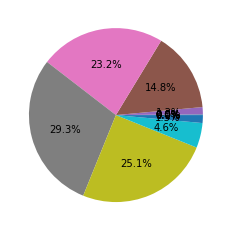

In [37]:
plt.pie(min,autopct='%1.1f%%')
plt.show()